<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Machine_Learning_Tools_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas Example
In the following example, we'll go through some data manipulation with Pandas

First, we'll import the pandas module

In [1]:
import pandas as pd

Next, we'll make a simple data frame. A data frame is made up of columns with titles. In this case, we have two columns: Country and Rank

In [2]:
data = pd.DataFrame({'Country': ['Russia', 'Colombia', 'Chile', 'Ecuador', 'Nigeria'], 'Rank':[121, 40, 100, 130, 11]})
data

,Country,Rank
0,Russia,121
1,Colombia,40
2,Chile,100
3,Ecuador,130
4,Nigeria,11


We can sort the values by a specific column. This demonstrates one of many simple functions that can be performed with a dataframe

In [3]:
data.sort_values(by=['Rank'], ascending=True, inplace=False)

,Country,Rank
4,Nigeria,11
1,Colombia,40
2,Chile,100
0,Russia,121
3,Ecuador,130


Next, let's make a new data frame that shows the type of meat and number of ounces a deli counter sold in an hour. 

In [45]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham'], 'ounces':[4,3,12,6,7.5, 8, 3, 5]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0


We can add a column showing what animal each type of meat came from. To do this, we can create a map and then apply the map to a column of the dataframe. We can add the result as a new column. 

In [46]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami':'cow',
    'corned beef':'cow',
    'honey ham':'pig'
}
data['food'] = data['food'].str.lower()
data['animal'] = data['food'].map(meat_to_animal)


Finally, we can group purchases together based on type of meat. In this case, we have multiple entries for bacon and pastrami. We can combine these rows into one row, and apply a mean function to the number of ounces to show the mean number of ounces of each purchase at the deli counter. We can also display the total number of ounces in another column. 

In [47]:
data['total'] = data['ounces']
data = data.groupby('food').agg({'ounces': 'mean', 'animal': 'first', 'total':'sum'}).reset_index()
data.columns = ['mean ounces' if x=='ounces' else x for x in data.columns]

data

,food,mean ounces,animal,total
0,bacon,8.0,pig,24.0
1,corned beef,7.5,cow,7.5
2,honey ham,5.0,pig,5.0
3,pastrami,4.5,cow,9.0
4,pulled pork,3.0,pig,3.0


### Scikit-Learn Example
In the following example, we'll go through importing some python libraries and working with a provided dataset to demonstrate a simple computer vision problem

To start, we'll import some essential libraries for visualizing our results and working with provided datasets. Note that we also import an svm classifier.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Next, we import the digits dataset. This dataset contains images of handwritten digits. In this example, we'll be teaching a machine to recognize the handwritten digits.

In [ ]:
digits = datasets.load_digits()

Using matplotlib, we can visualize some of our training data that we just imported. These images have labels that are shown above the image

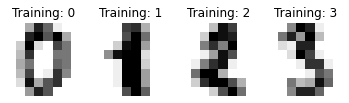

In [ ]:
_, axes = plt.subplots(1,4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image,label) in zip(axes[:], images_and_labels[:4]):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title('Training: %i' % label)

Next, we prepare our data for training by putting it into the correct format for an svm classifier. 

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

We create an SVC classifier with a gamma value of .001. Gamma dictates how to scale each feature that is being considered.

In [ ]:
classifier = svm.SVC(gamma=.001)

After creating the classifier, we split our data in training data and testing data. This is done by a predefined function, where we dictate how large of a testing size to have. Then, we fit our classifier to our data. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Once the classifier is fit to the training data, we can test it with test data by calling the predict function. 

In [ ]:
predicted = classifier.predict(x_test)

Finally, we visualize some predictions of the test data. 

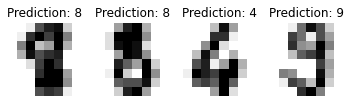

In [ ]:
_, axes = plt.subplots(1,4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

### Tensorflow/Keras Example

In [1]:
import imutils

def sliding_window(image, step, ws):
  #slide window across image
  for y in range(0, image.shape[0] - ws[1], step):
    for x in range(0, image.shape[1] - ws[0], step):
      #yield the current window
      yield(x, y, image[y:y+ws[1], x:x+ws[0]])

def image_pyramid(image, scale=1.5, minSize=(224,224)):
  #yield the original image
  yield image

  #keep looping over the image pyramid
  while True:
    #compute the dimensions of the next image in the pyramid
    w = int(image.shape[1] / scale)
    image = imutils.resize(image, width=w)

    #if the resized image doesn't meet the supplied minimum size, then stop
    if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
      break

    #yield the next image in the pyramid
    yield image

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow
import numpy as np
import imutils
import time
import cv2

In [5]:
size = "(300,150)"
min_conf = 0.9
visualize = -1

WIDTH = 600
PYR_SCALE = 1.5
WIN_STEP = 16
ROI_SIZE = eval(size)
INPUT_SIZE = (224,224)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 85054  100 85054    0     0   140k      0 --:--:-- --:--:-- --:--:--  140k


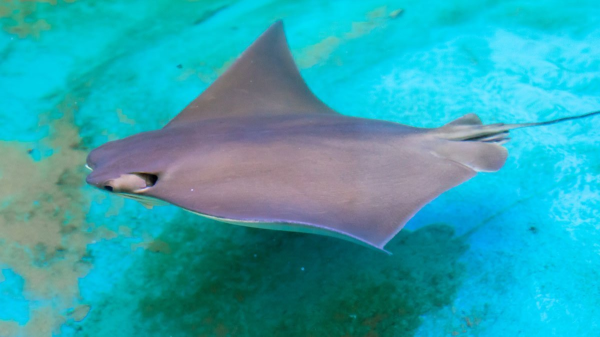

In [59]:
!curl -o stingray.jpg https://www.cmaquarium.org/app/uploads/2019/01/stingray-swimming-1200-wide.jpg
orig = cv2.imread('stingray.jpg', cv2.IMREAD_UNCHANGED)
orig = imutils.resize(orig, width=WIDTH)
(H,W) = orig.shape[:2]
cv2_imshow(orig)

In [60]:
#load network weights
print("[INFO] loading network...")
model = ResNet50(weights='imagenet', include_top=True)


[INFO] loading network...


In [61]:
pyramid = image_pyramid(orig, scale=PYR_SCALE, minSize=ROI_SIZE)

rois = []
locs = []

start = time.time()

In [62]:
for image in pyramid:
  scale = W/float(image.shape[1])

  for (x,y,roiOrig) in sliding_window(image, WIN_STEP, ROI_SIZE):
    x = int(x*scale)
    y = int(y*scale)
    w = int(ROI_SIZE[0] * scale)
    h = int(ROI_SIZE[1] * scale)

    roi = cv2.resize(roiOrig, INPUT_SIZE)
    roi = img_to_array(roi)
    roi = preprocess_input(roi)

    rois.append(roi)
    locs.append((x,y,x+w,y+h))

    if visualize > 0:
      clone = orig.copy()
      cv2.rectangle(clone, (x,y), (x+w, y+h), (0,255,0),2)
      cv2_imshow("Visualization", clone)
      cv2_imshow("ROI", roiOrig)
      cv2.waitKey(0)

In [63]:
end=time.time()
print("[INFO] looping over pyramid/windows took {:.5f} seconds".format(end-start))

rois = np.array(rois, dtype="float32")

print("[INFO] classifying ROIs...")
start = time.time()
preds = model.predict(rois)
end = time.time()
print("[INFO] classifying ROIs took {:.5f} seconds".format(end-start))

preds = imagenet_utils.decode_predictions(preds, top=1)
labels = {}

[INFO] looping over pyramid/windows took 3.49438 seconds
[INFO] classifying ROIs...
[INFO] classifying ROIs took 41.03716 seconds


In [64]:
# loop over the predictions
for (i, p) in enumerate(preds):
	# grab the prediction information for the current ROI
	(imagenetID, label, prob) = p[0]
	# filter out weak detections by ensuring the predicted probability
	# is greater than the minimum probability
	if prob >= min_conf:
		# grab the bounding box associated with the prediction and
		# convert the coordinates
		box = locs[i]
		# grab the list of predictions for the label and add the
		# bounding box and probability to the list
		L = labels.get(label, [])
		L.append((box, prob))
		labels[label] = L

[INFO] showing the results for 'stingray'


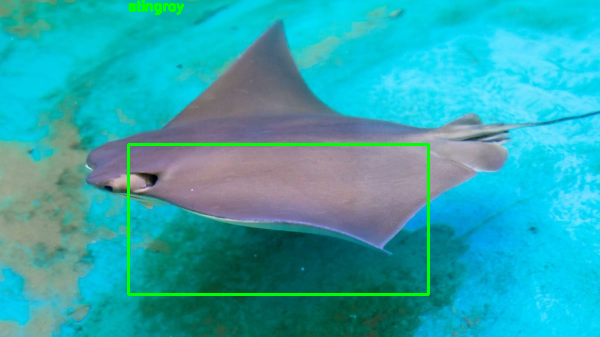

In [65]:
for label in labels.keys():
  if(label != "stingray"):
    continue
  print("[INFO] showing the results for '{}'".format(label))
  clone = orig.copy()

  for (box, prob) in labels[label]:
    (startX, startY, endX, endY) = box
    cv2.rectangle(clone, (startX, startY), (endX, endY), (0,255,0), 2)
    clone = orig.copy()
    
    boxes = np.array([p[0] for p in labels[label]])
    proba = np.array([p[1] for p in labels[label]])
    boxes = non_max_suppression(boxes, proba)

    for (startX, startY, endX, endY) in boxes:
      cv2.rectangle(clone, (startX, startY), (endX, endY), (0,255,0),2)
      y = startY = 10 if startY-10 > 10 else startY + 10
      cv2.putText(clone, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 2)
    cv2_imshow(clone)